## Customer Data Management and Analysis

In [4]:
import pyodbc
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------ Connect with the Database ------------------------------
engine = create_engine('mssql+pyodbc://localhost/FinalDWH?driver=ODBC+Driver+17+for+SQL+Server')
connection = engine.connect()
query='''SELECT 
    fo.order_id_sk,
    c.customer_sk,
    c.name AS customer_name,
    c.email AS customer_email,
    c.phone AS customer_phone,
    
    s.seller_sk,
    s.seller_name,
    s.email AS seller_email,
    s.phone AS seller_phone,
    
    p.product_sk,
    p.product_name,
    p.description AS product_description,
    p.category_name,
    p.subcategory_name,
    
    pay.payment_sk,
    pay.payment_method,
    
    sm.shipping_method_sk,
    sm.shipping_method_name,
    
    d.full_date AS order_date,
    fo.quantity,
    fo.total_amount,
    fo.discount,
    fo.product_price,
    fo.seller_salary,
    fo.shipping_cost
FROM 
    FactOrders fo
JOIN 
    DimCustomer c ON fo.customer_sk = c.customer_sk
JOIN 
    DimSeller s ON fo.seller_sk = s.seller_sk
JOIN 
    DimProduct p ON fo.product_sk = p.product_sk
JOIN 
    DimPayment pay ON fo.payment_sk = pay.payment_sk
JOIN 
    DimShipping_method sm ON fo.shipping_method_sk = sm.shipping_method_sk
JOIN 
    DimDate d ON fo.order_date_sk = d.date_sk; '''

## Importing tables

In [ ]:
df = pd.read_sql(query, connection)
connection.close()
print(df)

## visualization 

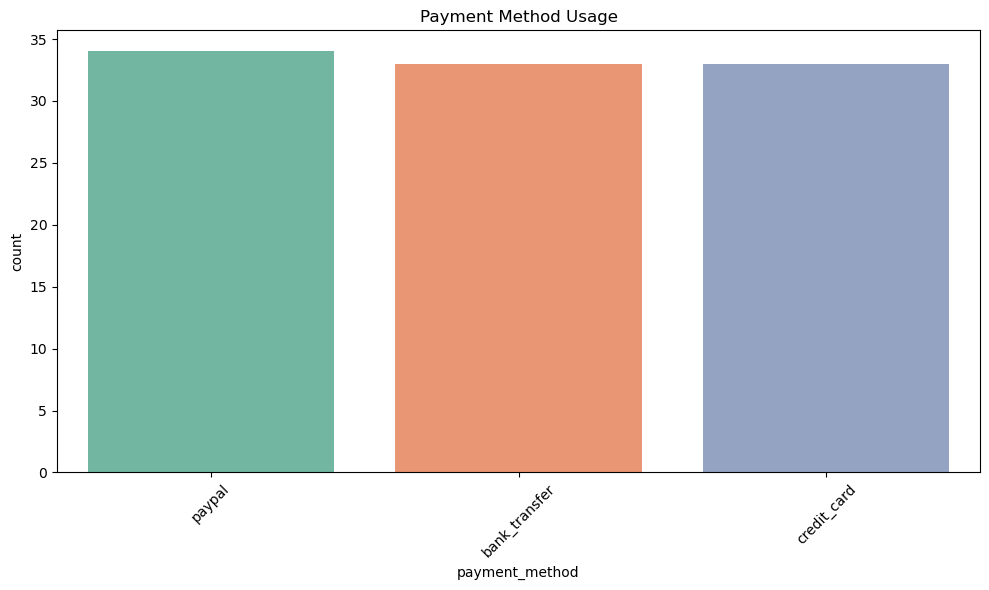

In [6]:
#1  Payment Method Usage
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='payment_method', palette='Set2')
plt.title('Payment Method Usage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

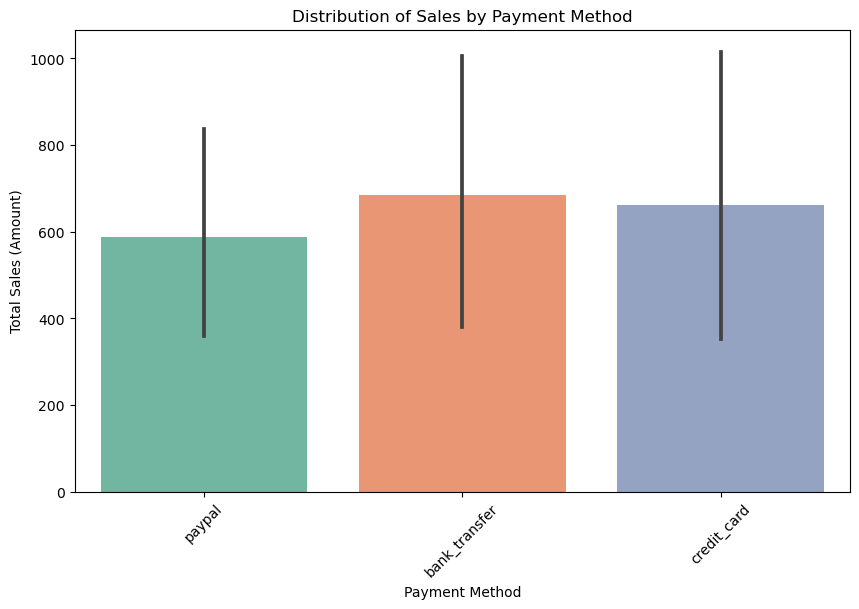

In [7]:
#2 Distribution of Sales by Payment Method
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='payment_method', y='total_amount', palette='Set2')
plt.title('Distribution of Sales by Payment Method')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.ylabel('Total Sales (Amount)')
plt.show()

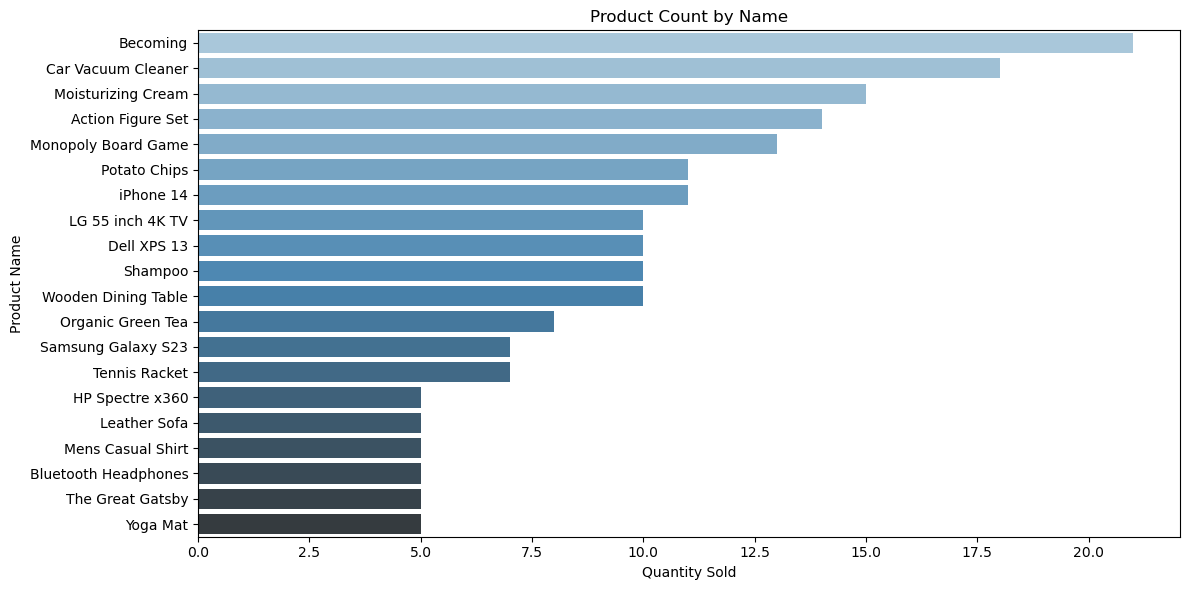

In [8]:
#3 Product Count by Name
product_count = df.groupby('product_name')['quantity'].sum().reset_index()
product_count = product_count.sort_values(by='quantity', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='quantity', y='product_name', data=product_count, palette='Blues_d')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.title('Product Count by Name')

plt.tight_layout()
plt.show() 

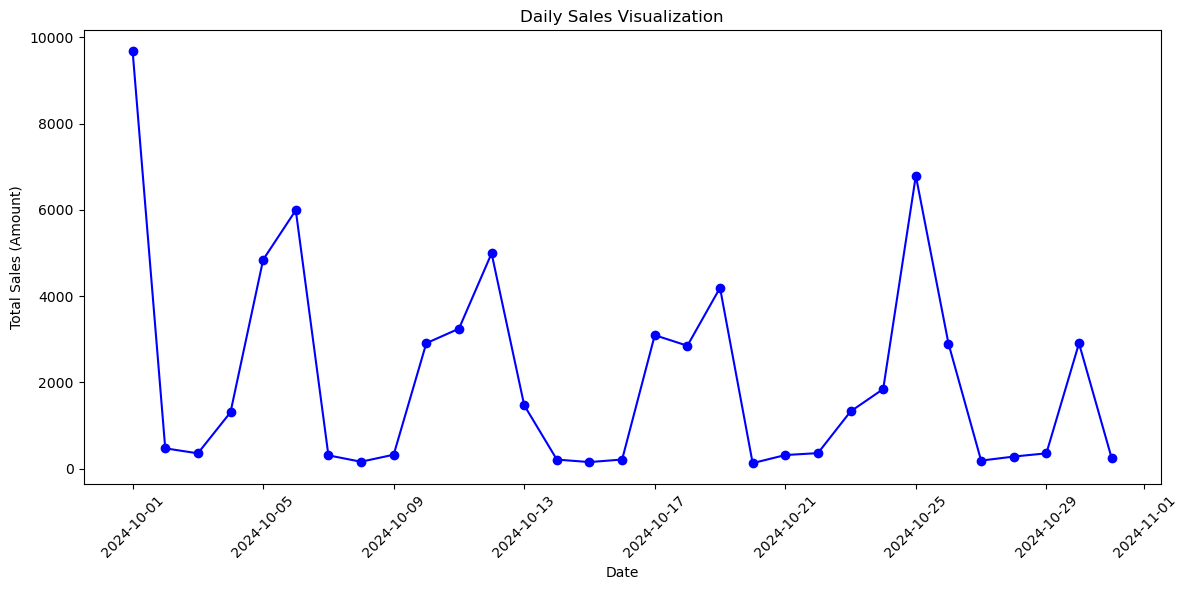

In [9]:
#4Daily Sales Visualization
daily_sales = df.groupby('order_date')['total_amount'].sum()
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line', marker='o', color='b')
plt.xlabel('Date')
plt.ylabel('Total Sales (Amount)')
plt.title('Daily Sales Visualization')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

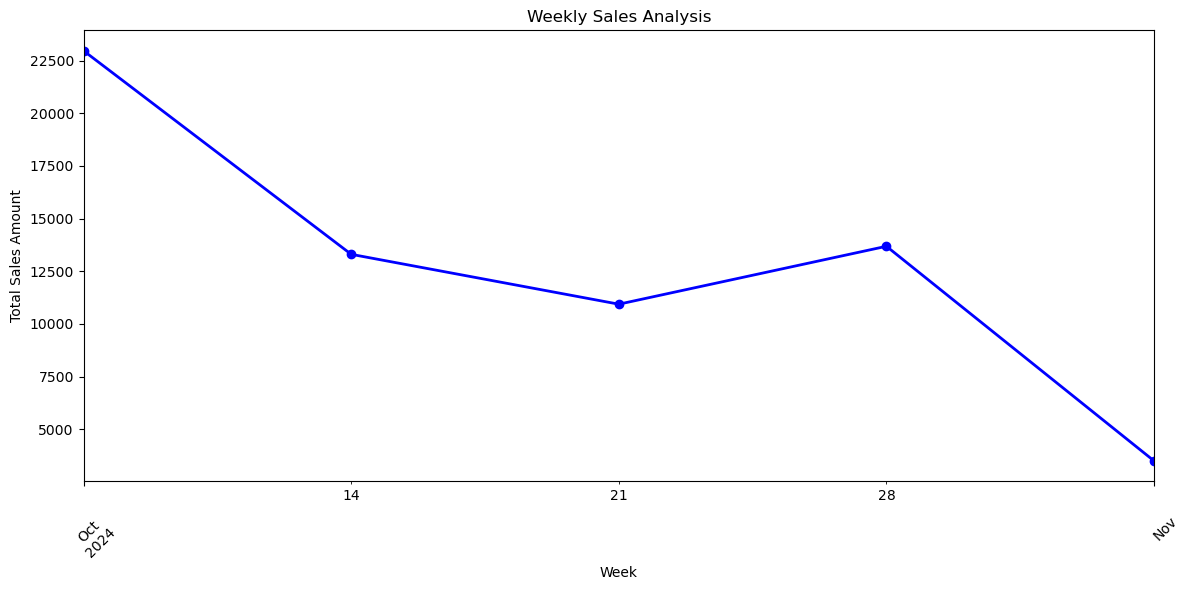

In [10]:
# 5 Weekly Sales Analysis

df['order_date'] = pd.to_datetime(df['order_date'])
weekly_sales = df.resample('W-Mon', on='order_date')['total_amount'].sum()

plt.figure(figsize=(12, 6))
weekly_sales.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Weekly Sales Analysis')
plt.xlabel('Week')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

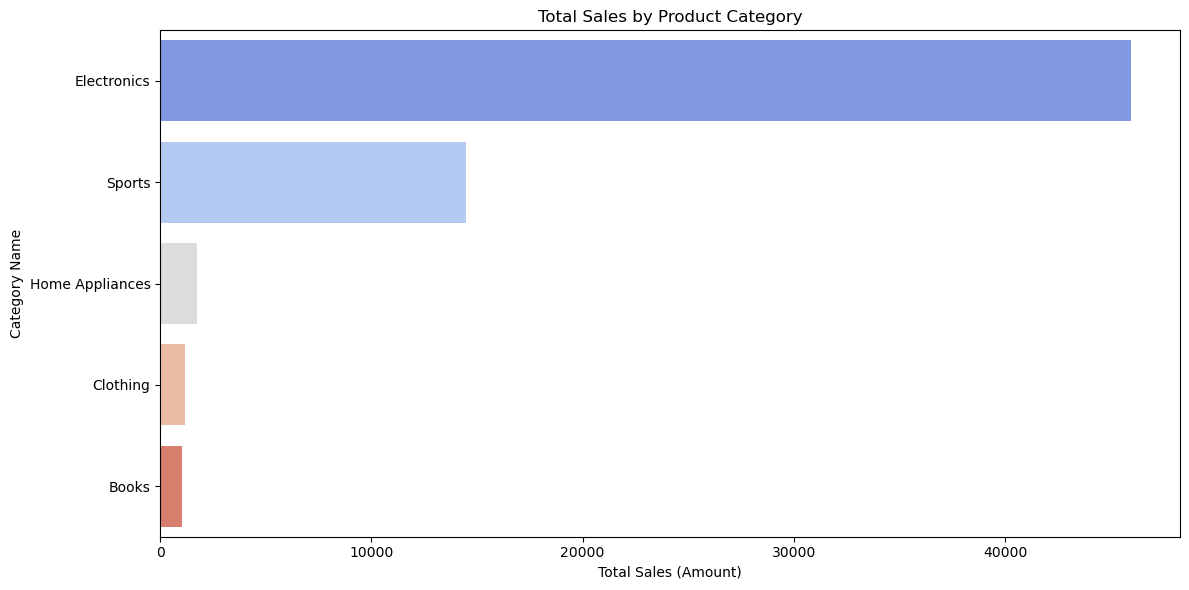

In [11]:
#Category Sales Distribution
category_sales = df.groupby('category_name')['total_amount'].sum().reset_index()
category_sales = category_sales.sort_values(by='total_amount', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='total_amount', y='category_name', data=category_sales, palette='coolwarm')

plt.xlabel('Total Sales (Amount)')
plt.ylabel('Category Name')
plt.title('Total Sales by Product Category')

plt.tight_layout()
plt.show()

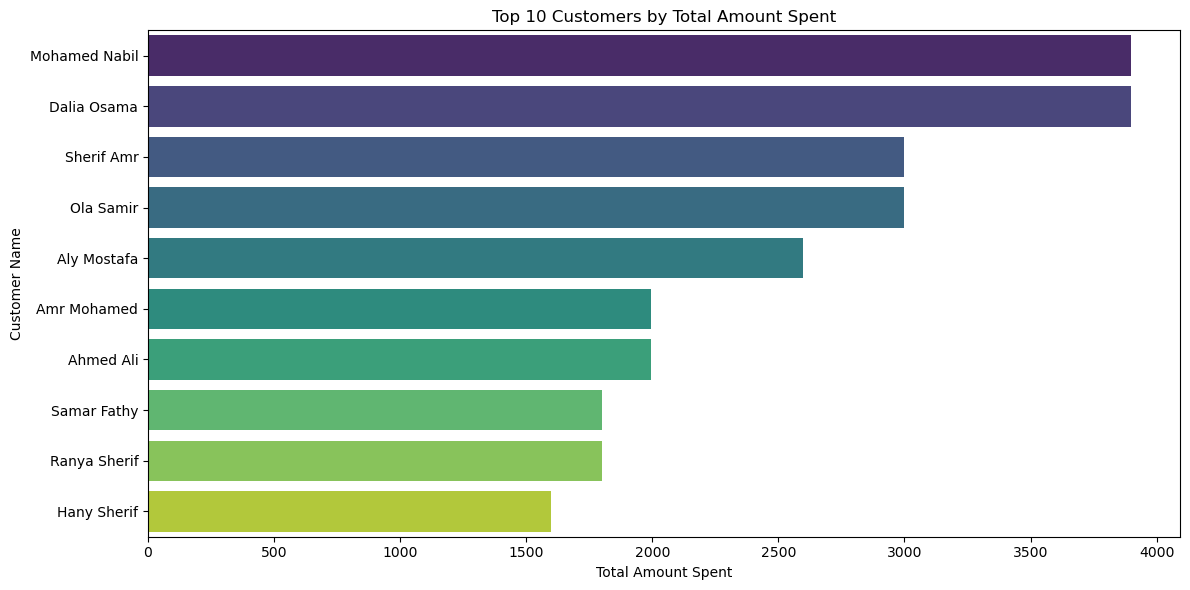

In [12]:
#Top 10 Customers by Total Amount Spent
top_customers = df.groupby('customer_name')['total_amount'].sum().reset_index()
top_customers = top_customers.sort_values(by='total_amount', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='total_amount', y='customer_name', data=top_customers, palette='viridis')
plt.xlabel('Total Amount Spent')
plt.ylabel('Customer Name')
plt.title('Top 10 Customers by Total Amount Spent')
plt.tight_layout()
plt.show()


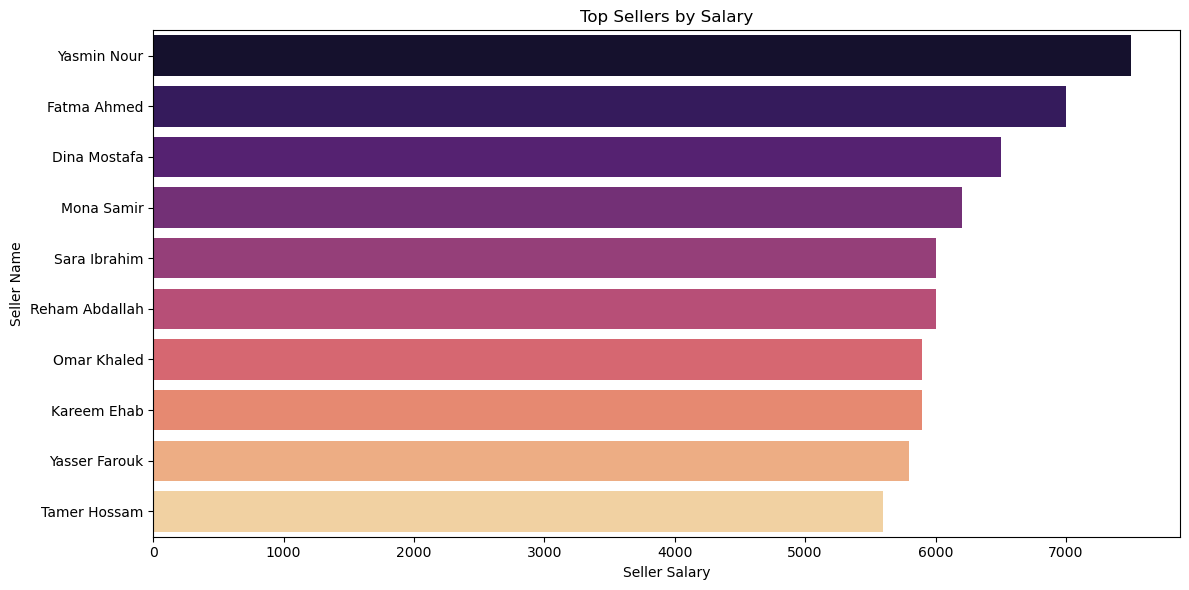

In [13]:
#Top Sellers by Salary
top_sellers = df.groupby('seller_name')['seller_salary'].max().reset_index()
top_sellers = top_sellers.sort_values(by='seller_salary', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='seller_salary', y='seller_name', data=top_sellers, palette='magma')
plt.xlabel('Seller Salary')
plt.ylabel('Seller Name')
plt.title('Top Sellers by Salary')
plt.tight_layout()
plt.show()

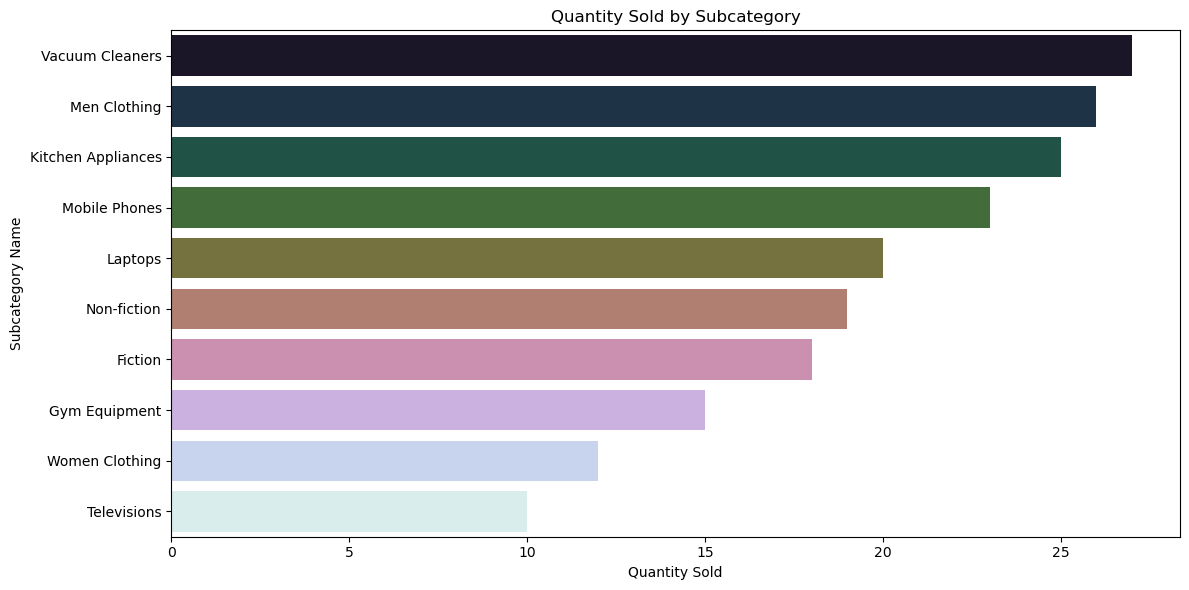

In [14]:
#Quantity Sold by Subcategory
subcategory_quantity = df.groupby('subcategory_name')['quantity'].sum().reset_index()
subcategory_quantity = subcategory_quantity.sort_values(by='quantity', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='quantity', y='subcategory_name', data=subcategory_quantity, palette='cubehelix')
plt.xlabel('Quantity Sold')
plt.ylabel('Subcategory Name')
plt.title('Quantity Sold by Subcategory')
plt.tight_layout()
plt.show()

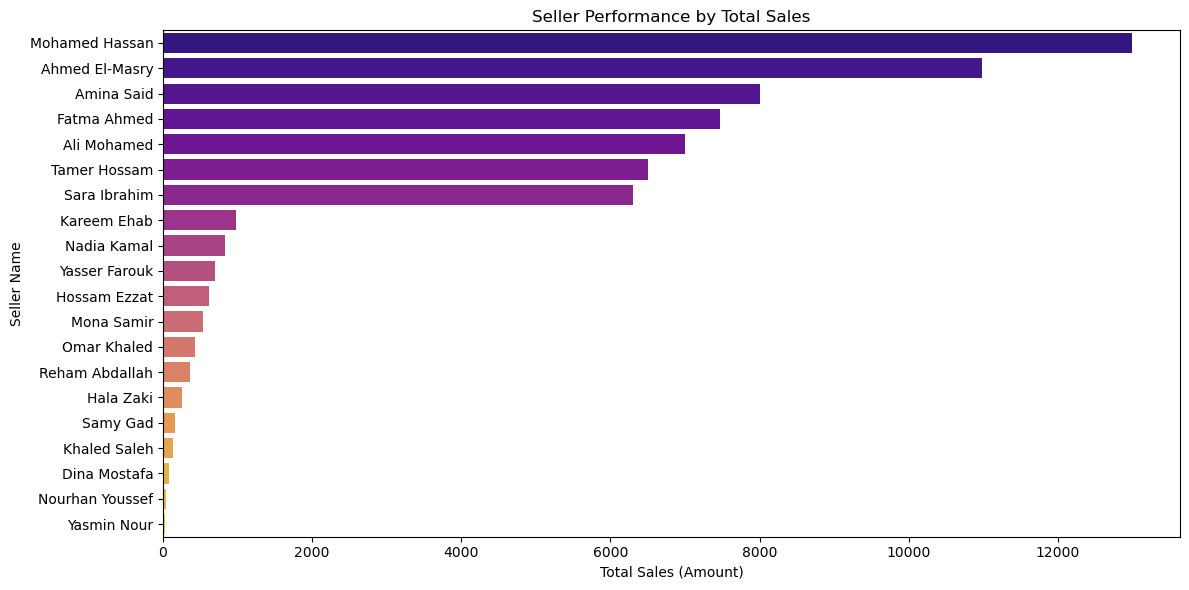

In [15]:
#Seller Performance by Total Sales
seller_performance = df.groupby('seller_name')['total_amount'].sum().reset_index()
seller_performance = seller_performance.sort_values(by='total_amount', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='total_amount', y='seller_name', data=seller_performance, palette='plasma')
plt.xlabel('Total Sales (Amount)')
plt.ylabel('Seller Name')
plt.title('Seller Performance by Total Sales')
plt.tight_layout()
plt.show()

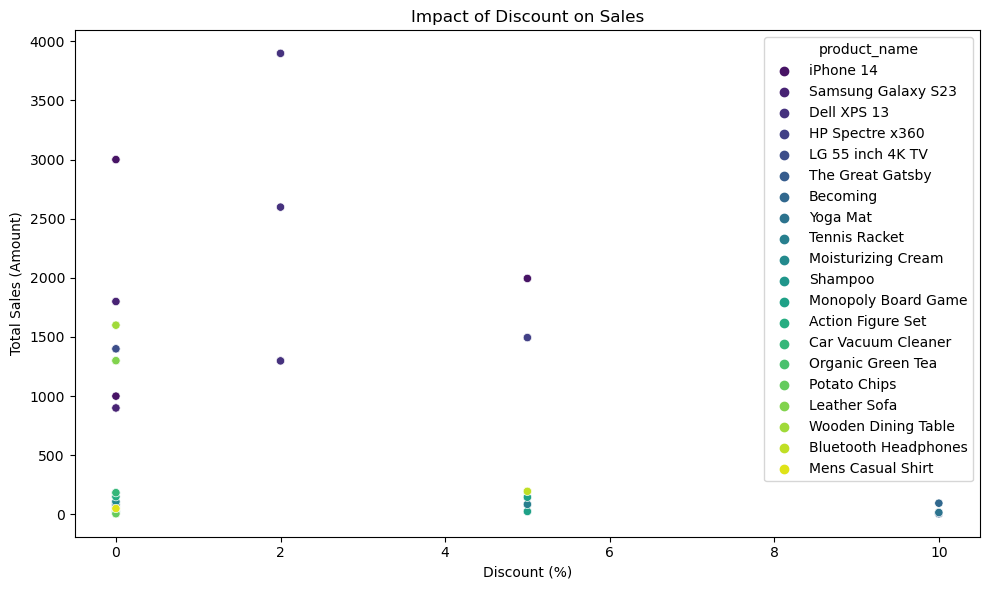

In [16]:
#Impact of Discount on Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount', y='total_amount', data=df, hue='product_name', palette='viridis')
plt.xlabel('Discount (%)')
plt.ylabel('Total Sales (Amount)')
plt.title('Impact of Discount on Sales')
plt.tight_layout()
plt.show()

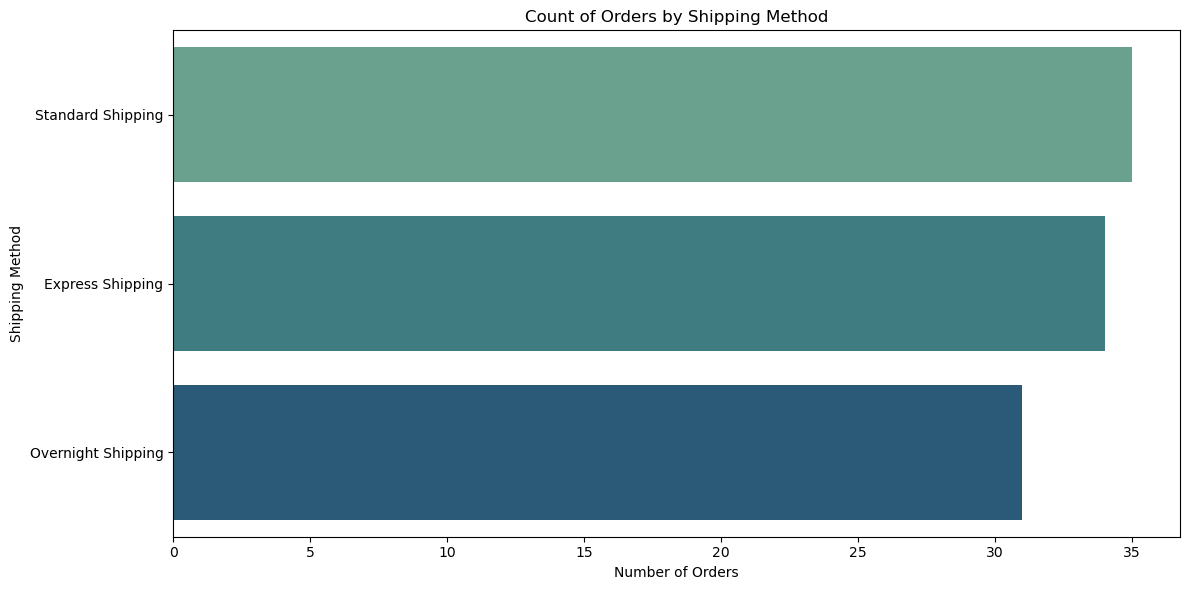

In [17]:
#Count of Orders by Shipping Method
shipping_count = df['shipping_method_name'].value_counts().reset_index()
shipping_count.columns = ['shipping_method_name', 'order_count']

plt.figure(figsize=(12, 6))
sns.barplot(x='order_count', y='shipping_method_name', data=shipping_count, palette='crest')
plt.title('Count of Orders by Shipping Method')
plt.xlabel('Number of Orders')
plt.ylabel('Shipping Method')
plt.tight_layout()
plt.show()


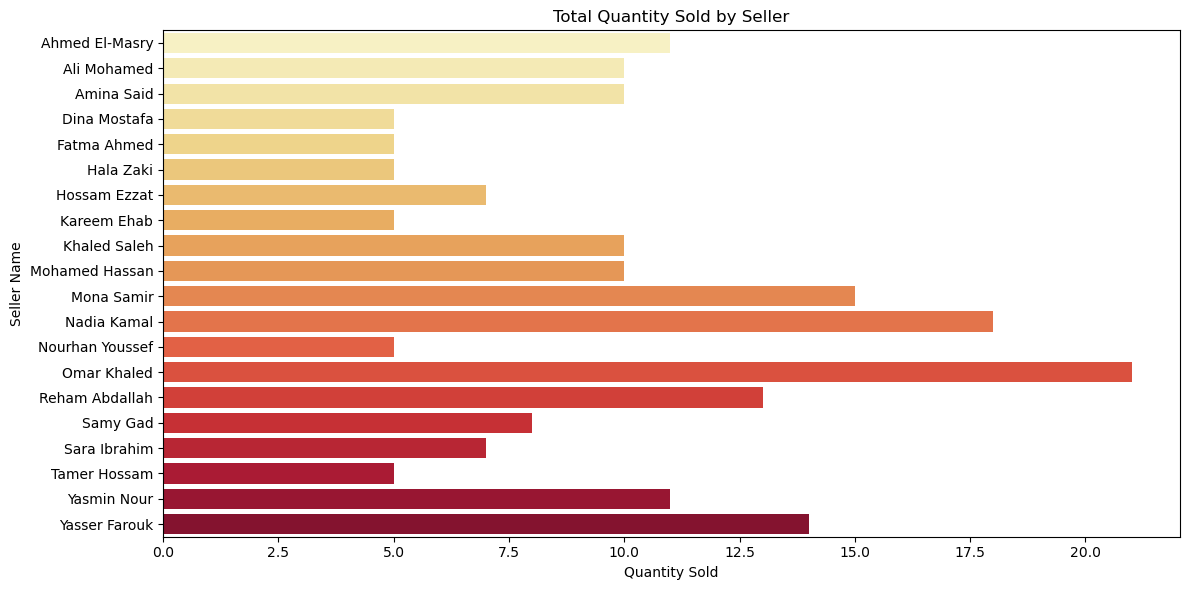

In [18]:
#Total Quantity Sold by Seller
seller_quantity = df.groupby('seller_name')['quantity'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='quantity', y='seller_name', data=seller_quantity, palette='YlOrRd')
plt.title('Total Quantity Sold by Seller')
plt.xlabel('Quantity Sold')
plt.ylabel('Seller Name')
plt.tight_layout()
plt.show()

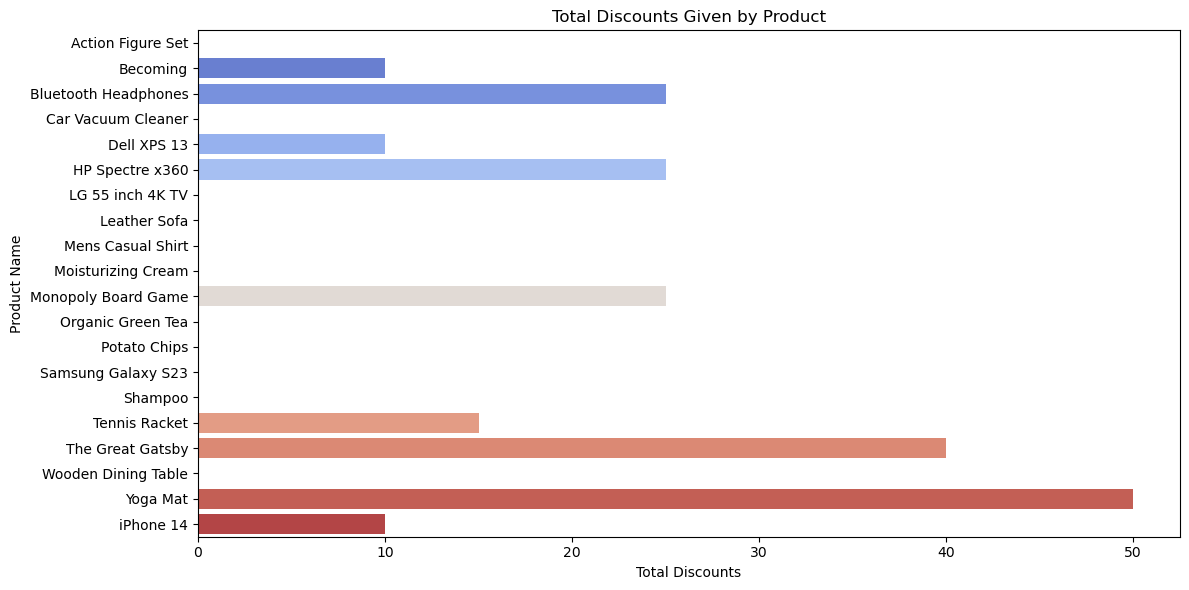

In [19]:
#Total Discounts Given by Product
discounts_given = df.groupby('product_name')['discount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='discount', y='product_name', data=discounts_given, palette='coolwarm')
plt.title('Total Discounts Given by Product')
plt.xlabel('Total Discounts')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

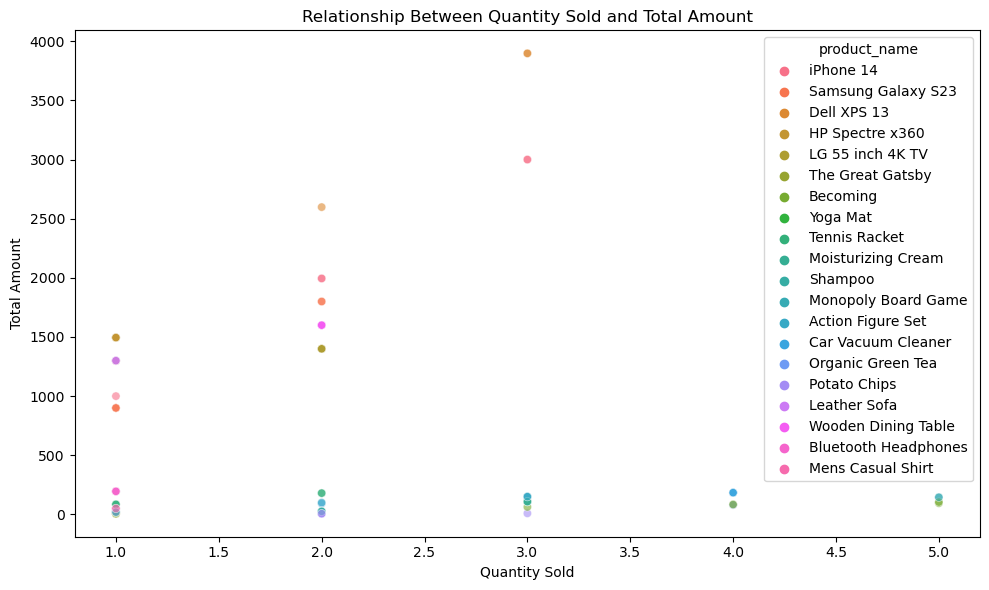

In [20]:
#Relationship Between Quantity Sold and Total Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='quantity', y='total_amount', hue='product_name', palette='husl', alpha=0.6)
plt.title('Relationship Between Quantity Sold and Total Amount')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()

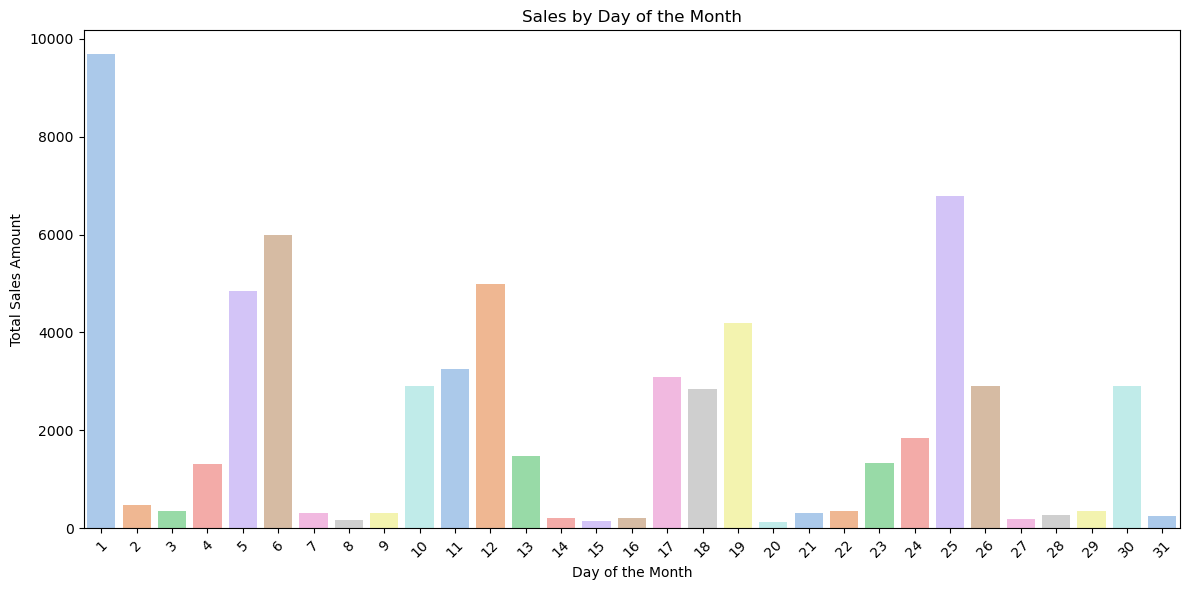

In [21]:
#Sales by Day of the Month
day_of_month_sales = df.groupby(df['order_date'].dt.day)['total_amount'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=day_of_month_sales.index, y=day_of_month_sales.values, palette='pastel')
plt.title('Sales by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

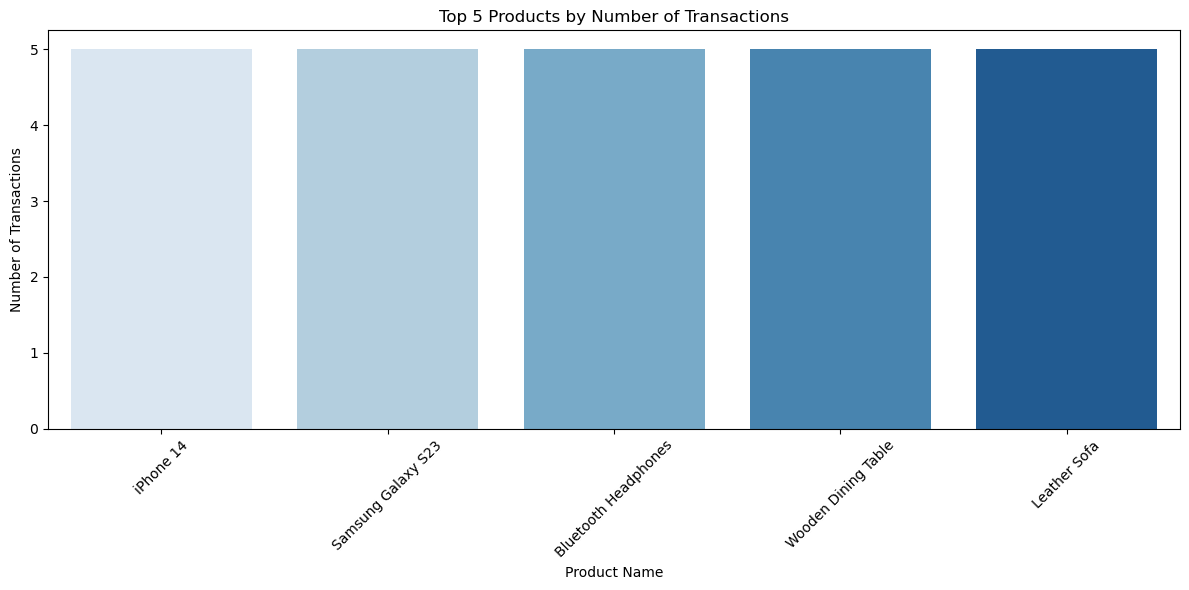

In [22]:
#Top 5 Products by Number of Transactions
top_products_by_transactions = df['product_name'].value_counts().head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_by_transactions.index, y=top_products_by_transactions.values, palette='Blues')
plt.title('Top 5 Products by Number of Transactions')
plt.xlabel('Product Name')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
